In [2]:
# Essentials
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
# import matplotlib.gridspec as gridspec

In [3]:
ROOT_DIR = Path(os.path.abspath('')).parent
print(ROOT_DIR)
RESULTS_DIR = os.path.join(ROOT_DIR, "resultfiles", "baselines", "keyword_extraction")

kw_baseline_scores = pd.read_csv(os.path.join(RESULTS_DIR, "mean_kw_baselines.csv"))
kw_baseline_scores.rename(columns={"Unnamed: 0": "baselines"}, inplace=True)
# kw_baseline_scores.set_index("baselines", inplace=True)
kw_baseline_scores

C:\Users\HP\Desktop\Tese\Dissertacao\Pratica\Tweet2Story\T2S


,baselines,precision,recall,jaccard,rouge1_precision,rouge1_fscore,R_precision,total_topics
0,TFIDF,35.965,35.965,22.880,35.965,35.965,35.965,57
1,RAKE,8.460,8.460,4.892,8.285,8.285,8.285,57
2,YAKE,34.035,34.035,21.704,34.211,34.240,34.035,57
3,TextRank,9.968,9.968,6.023,15.109,15.797,14.212,57
4,TopicRank,12.008,12.008,6.753,28.647,27.499,24.252,57
5,KeyBert,7.368,7.368,4.107,32.018,31.462,30.877,57


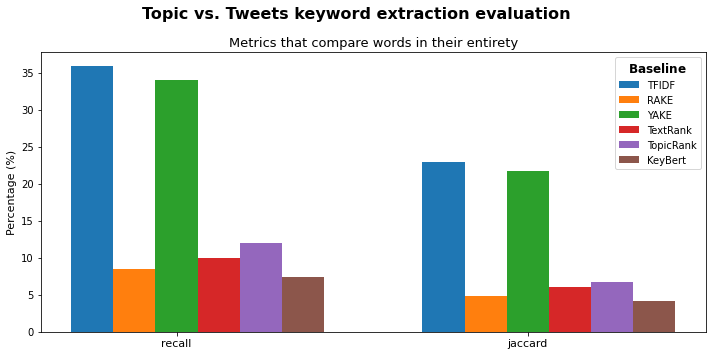

In [4]:
pl.figure(figsize=(10, 5))
plt.suptitle("Topic vs. Tweets keyword extraction evaluation", fontsize=16, fontweight="bold")

x = np.arange(2)
width=0.12

plt.bar(x - width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TFIDF", ["recall", "jaccard"]].values[0], width, label="TFIDF")
plt.bar(x - width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "RAKE", ["recall", "jaccard"]].values[0], width, label="RAKE")
plt.bar(x, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "YAKE", ["recall", "jaccard"]].values[0], width, label="YAKE")
plt.bar(x + width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TextRank", ["recall", "jaccard"]].values[0], width, label="TextRank")
plt.bar(x + width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TopicRank", ["recall", "jaccard"]].values[0], width, label="TopicRank")
plt.bar(x + width*3, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "KeyBert", ["recall", "jaccard"]].values[0], width, label="KeyBert")

plt.title("Metrics that compare words in their entirety", fontsize=13)
plt.xticks(x, ["recall", "jaccard"], fontsize=11)
plt.ylabel("Percentage (%)", fontsize=11)

plt.legend(bbox_to_anchor=(1, 1), title=r"$\bf{Baseline}$", title_fontsize=12)

plt.tight_layout()
plt.show()

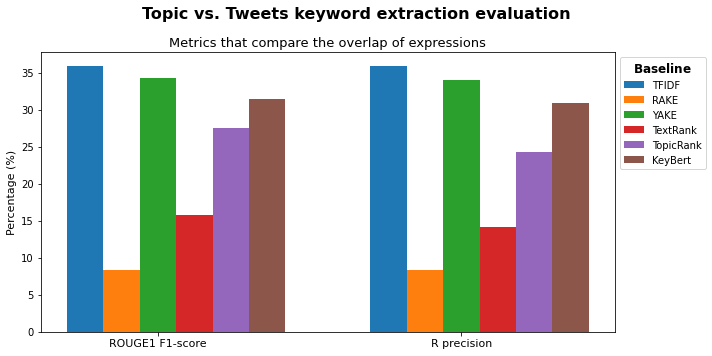

In [5]:
pl.figure(figsize=(10, 5))
plt.suptitle("Topic vs. Tweets keyword extraction evaluation", fontsize=16, fontweight="bold")

x = np.arange(2)
width=0.12

plt.bar(x - width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TFIDF", ["rouge1_fscore", "R_precision"]].values[0], width, label="TFIDF")
plt.bar(x - width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "RAKE", ["rouge1_fscore", "R_precision"]].values[0], width, label="RAKE")
plt.bar(x, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "YAKE", ["rouge1_fscore", "R_precision"]].values[0], width, label="YAKE")
plt.bar(x + width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TextRank", ["rouge1_fscore", "R_precision"]].values[0], width, label="TextRank")
plt.bar(x + width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TopicRank", ["rouge1_fscore", "R_precision"]].values[0], width, label="TopicRank")
plt.bar(x + width*3, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "KeyBert", ["rouge1_fscore", "R_precision"]].values[0], width, label="KeyBert")

plt.title("Metrics that compare the overlap of expressions", fontsize=13)
plt.xticks(x, ["ROUGE1 F1-score", "R precision"], fontsize=11)
plt.ylabel("Percentage (%)", fontsize=11)

plt.legend(bbox_to_anchor=(1, 1), title=r"$\bf{Baseline}$", title_fontsize=12)

plt.tight_layout()
plt.show()

## Some notes about the 3 graphs above
There are some nuances to each metric and way of evaluating the baselines, which will be explained here.

### Metrics that compare entire words
- __Precision__ - This precision compares entire words between the news keywords and the tweets keywords. It is a straightforward comparison.
- In general, __TFIDF__ usually gets better results, because it only contains __one-word keywords__, while other methods contain keywords with __more than one word__, which penalizes them more severely since they have more words they can fail.

### Overlap metrics
- The overlap between keywords extracted from tweets and the news content is __measured through TF-IDF__, since the python implementation of ROUGE does not take into consideration __repeated words__, so the evaluation was __not diverse__. It only changed when the keyword had more words.
- Each tweet keyword has a TF-IDF value from the news content TF-IDF matrix. A mean is made from each keyword the baseline gives.
- Again, the __TF-IDF__ baseline only predicts one-word keywords, therefore it gains a boost in the metric.

### Similarity based metrics
- The overlap is measured between every tweet keyword with every topic keyword.
- The percentage of overlap is __generally low__, because __only a few keywords are actually comparable__ with each other, but in order not to lose any comparison, every keyword is compared.
- __KeyBert__ shows a massive improvement compared to the other baselines. This is explained because KeyBert, unlike the others, __generates synthetic keywords__ repeating some of them a lot, therefore the overlap is greater between them all.